### Clustering

Clustering is a technique that involves grouping of similar data points. When a set of data points is provided we can use clustering to classify each data point into a specific group. Data points that are in the same group should exhibit similar features.

Types of Clustering:
1. Hard Clustering: It is a type of clustering where each data point either belongs to a cluster completely or not. This means every data point will belong to one and only one cluster at point.
2. Soft Clustering: It is a type of clustering where each data point can belong to a multiple clusters at a same point. This means data points can be associated to multiple clusters at the same point. 

There are also other types of clustering:
1. Connectivity Based Clustering: These models works on the basis of Distance and assume that if two data points are closer to each other they are similar to each other.The data points lying closer to each other will be grouped together in one cluster, and the data points lying far from each other will be separated in the different clusters.
2. Centroid Based Clustering: These models works on the notion that similarity is derived by the closeness of a data point to the centroid of the clusters. The poits will be divided into different clusters based on the closeness of the centroid. One of the most famous Algorithm that falls under this category is K means algorithm.
3. Density Based Clustering: These models cluster the data points by finding areas of varied density,a nd assigning data points to these different density region. 

### K Means Clustering

K means Algorithm is a centroid based Algorithm. It tries to make intra-cluster data points as similar as possible while also keep the clusters as different as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the clusters centroid minimum.

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 39.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=12860cf69f3aa11bf0a71ce586689406bbbb70f167574d5e80fb59e8627372c0
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


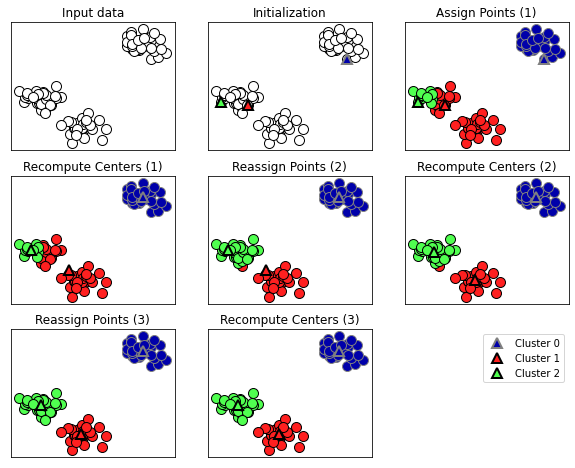

In [ ]:
import warnings
import mglearn
warnings.filterwarnings('ignore')
mglearn.plots.plot_kmeans_algorithm()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.select_dtypes("object").columns

Index(['Gender'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
d_types=dict(df.dtypes)
for name,type_ in d_types.items():
  if str(type_)=="object":
    le=LabelEncoder()
    df[name]=le.fit_transform(df[name])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


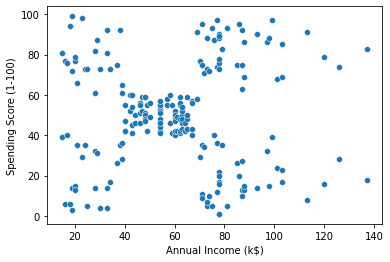

In [ ]:
sns.scatterplot(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [ ]:
x=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
print(x.shape)

(200, 2)


Now we are going to find the optimal number of clusters using the Elbow method. The Elbow method calculates the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k value for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

Within-Cluster-Sum of Squared Errors Algorithm:
1. The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
2. The WSS score is sum of these Squared Errors for all the points.
3. Any distance like Elucidian distance or Manhattan Distance can be used


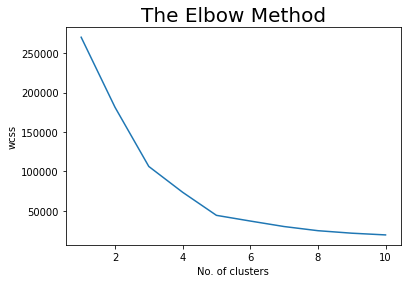

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()


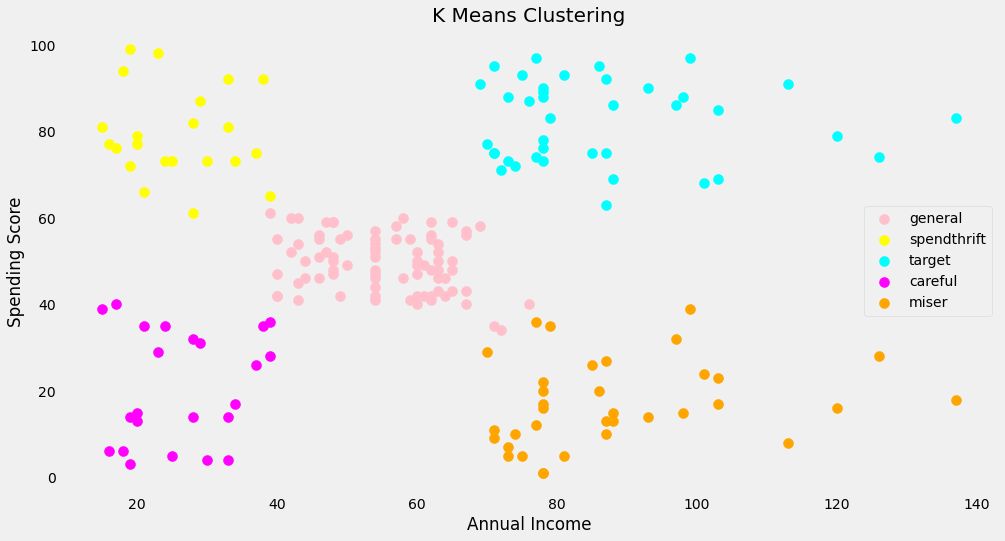

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

plt.rcParams['figure.figsize']=(15,8)
plt.style.use('fivethirtyeight')
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],s = 100,c = 'pink',label = 'general')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],s=100,c='yellow',label='spendthrift')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1],s=100,c='cyan',label='target')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1],s=100,c='magenta',label='careful')
plt.scatter(x[y_means == 4,0],x[y_means == 4,1],s=100,c='orange',label='miser')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering',fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

Silhouette method for obtaining the optimal number of clusters for kmeans

Silhouette Score:
Silhouette values lie in range of -1 to +1. The value of +1 is ideal and -1 is least preferred. Value of +1 incdicates that the sample is far away from its neighbouring cluster and very close to the cluster it is assign.  Value of -1 incdicates that the sample is close to its neighbouring cluster and than to the cluster its assigned. 

In [ ]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,km.labels_,metric='euclidean')
print(score)

0.553931997444648


In [ ]:
!pip install yellowbrick

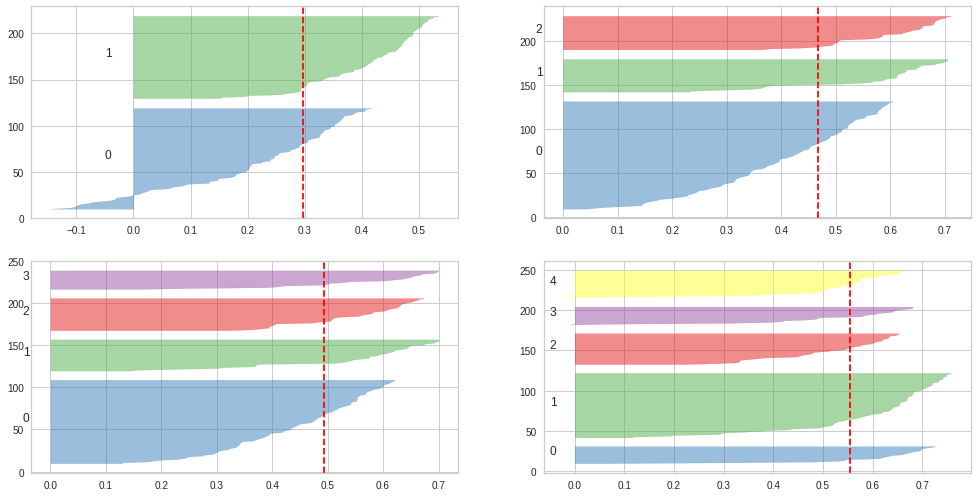

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig,ax=plt.subplots(2,2,figsize=(15,8))
for i in [2,3,4,5]:
  km=KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=10,random_state=42)
  q,mod=divmod(i,2)
  visualizer=SilhouetteVisualizer(km,colors="yellowbrick",ax=ax[q-1][mod])
  visualizer.fit(x)

### Hierarchical Clustering

It is an algorithm that groups similar objects into groups called clusters. It creates clusters that have a pre-determined ordering from top to bottom or bottom to top. The end point is a set of clusters, where each cluster is distinct from each other cluster.

There are two type of hierarchical clustering:
1. Divisive Method: Also called as Top-Down clustering method.Assign all the observations to a single cluster and then partition the cluster to atleast two similar clusters. Proceed recursively on each cluster until there is one cluster for each observation.
2. Agglomerative:  Also called as Bottom-Up clustering method. We assign each observation to its own cluster. And then compute the similarity(eg. distance) between each of the clusters and join the two most similar clusters.

Methods for computing distance between clusters:
1. Single Linkage: Distance between two clusters is defined as the shortest distance between two points in each cluster.
2. Complete Linkage: Distance between two clusters is defined as the longest distance between two points in each cluster(i.e. diatnce between the two farthest point of the clusters.).
3. Average Linkage:  Distance between two clusters is defined as the average distance between each point in one cluster to every point in other cluster.

In hierarchical clustering we cannot use elbow method for determining optimal number of clusters, but using Dendrograms chart.


In [ ]:
x=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
print(x.shape)

(200, 2)


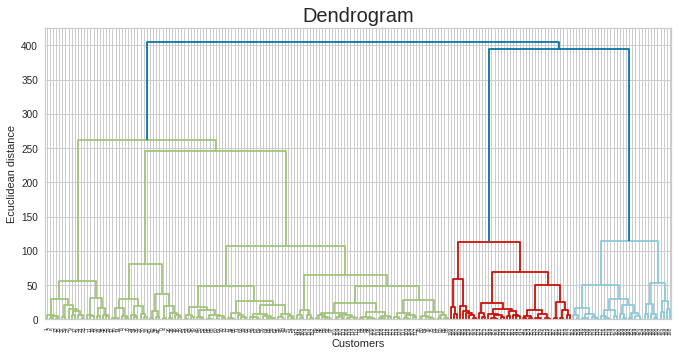

In [ ]:
import scipy.cluster.hierarchy as sch 

plt.rcParams['figure.figsize']=(10,5)
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

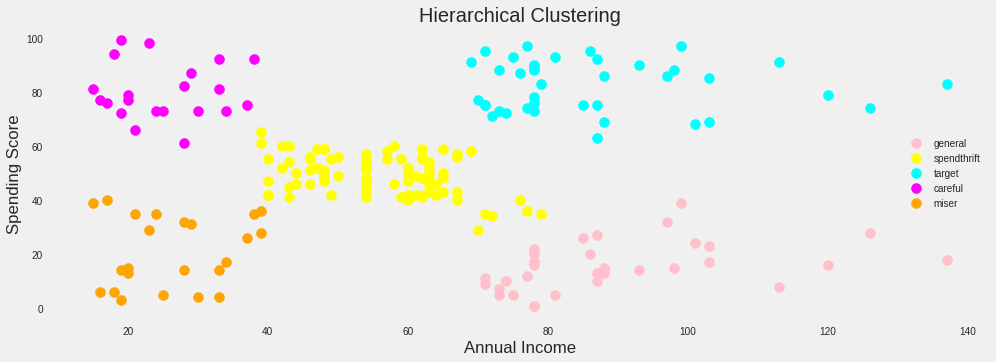

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('fivethirtyeight')
plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1],s = 100,c = 'pink',label = 'general')
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1],s=100,c='yellow',label='spendthrift')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1],s=100,c='cyan',label='target')
plt.scatter(x[y_hc == 3,0],x[y_hc == 3,1],s=100,c='magenta',label='careful')
plt.scatter(x[y_hc == 4,0],x[y_hc == 4,1],s=100,c='orange',label='miser')

plt.style.use('fivethirtyeight')
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### DBSCAN Clustering

DBSCAN stands for Density-based spatial clustering of applications with noise.
DBSCAN groups together points that are close to each other based on a distance measurement and a minimum number of points.

The DBSCAN basically requires 2 parameters that are:
1. Eps: This parameter specifies how close points should be to each other to be considered a part of the cluster. This Eps value will be considered as a threshold for considering 2 points as a neighbor.
2. Minpoints: This parameter is to specify the minimum number of points to form a dense region. Generally, the number of Minpoints is equal to twice the number of columns in dataset.

There are three types of points in the cluster when the DBSCAN cluster is completed:
1. Core: It is a point that have atleast m points within distancen from itself.
2. Border: This is apoint that has atleast One core point at a distance n.
3. Noise: which is a point that is neither Core nor Border. And it has less than m points within distance n from itself.

DBSCAN Algorithm:
1. Find all the neighboring points wihtin eps and identify the core points or visited with more than Minpoints neighbors.
2. For each core point which it is not assigned to a cluster, create a new cluster.
3. Find recursively all its density connected points and assign them to the same cluster as the core point.
4. Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

For selecting two parameters for DBSCAN:
1. MinPts= 2*dim where dim=dimensions of the dataset i.e no. of columns
2. Eps= For calculating eps, we will calculate the distance from each point to its closest neighbor using the Nearest Neighbors


In [ ]:
x=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
print(x.shape)

(200, 2)


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(x)
distances,indices=nbrs.kneighbors(x)

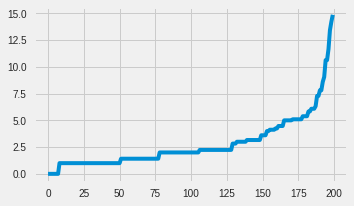

In [ ]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]

plt.rcParams['figure.figsize']=(5,3)
plt.plot(distances)
plt.show()

The value of the eps is the maximum curvature of the curve. From above figure it is around 8. So our eps value is 8.

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=8,min_samples=4)
clusters=dbscan.fit_predict(x)

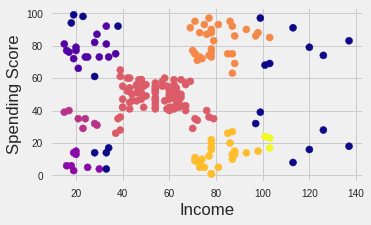

In [ ]:
plt.scatter(x[:,0],x[:,1],c=clusters,cmap='plasma')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()